In [80]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

In [81]:
X,Y=make_blobs?

In [ ]:
X,Y=make_blobs

In [82]:
X,Y=make_blobs( n_samples=500,
    n_features=2,
    centers=2,random_state=10)

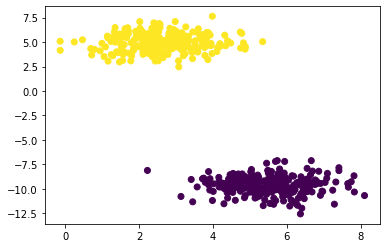

In [83]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [84]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))
def predict(X,weights):
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions
def loss(X,Y,weights):
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost
def update(X,Y,weights,learning_rate):
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    m=X.shape[0]
    weights=weights-learning_rate*dw/float(m)
    return weights
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    #Modifying the input to handle the bias term 
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    #Intialize th weights
    weights=np.zeros(X.shape[1])
    # Iterates over all epochs and make iterations
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        if(epoch%10==0):
            l=loss(X,Y,weights)
            print('Loss is ',l)
            print('Epoch is ',epoch)
    return weights 

In [85]:
weights=train(X,Y)

Loss is  0.0005716427275807603
Epoch is  0
Loss is  0.0005380401348680294
Epoch is  10
Loss is  0.0005082724670657031
Epoch is  20
Loss is  0.00048171316755303014
Epoch is  30
Loss is  0.0004578656677465869
Epoch is  40
Loss is  0.00043633126162387164
Epoch is  50
Loss is  0.0004167860730917803
Epoch is  60
Loss is  0.00039896424579255804
Epoch is  70
Loss is  0.0003826454765941762
Epoch is  80
Loss is  0.00036764563598875455
Epoch is  90


In [86]:
def getpredictions(X_test,weights,labels=True):
    if(X_test.shape[1] != weights.shape[0]):
        ones=np.ones((X_test.shape[0],))
        X_test=np.hstack((ones,weights))
    Y_=predict(X_test,weights)
    if(labels==False):
        return Y_
    else:
        Ypred=np.zeros(Y_.shape)
        Ypred[Y_>0.5]=1
        return Ypred

In [87]:
#x=np.array([1,2,3,4,5,0,0.1,0.3,10])
#y=np.zeros(x.shape)
#y[x>1]=1
#print(y)

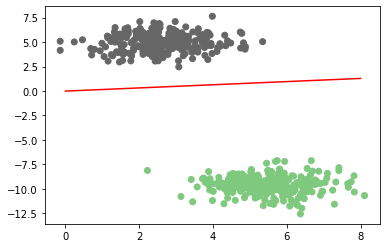

In [88]:
# Visualizing The Hypothesis 
w0=weights[0]
w1=weights[1]
w2=weights[2]

x1=np.linspace(0,8,10)
x2=-((w1*x1+w0)/w2)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2, c='r')
plt.show()

In [89]:
weights

array([ 0.02204952, -0.30768518,  1.90003958])

# Separate Story From Here 

In [90]:
# Testing on a Non Linear Classifiable Dataset 
from sklearn.datasets import make_moons
Xmoon,Ymoon=make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=1)

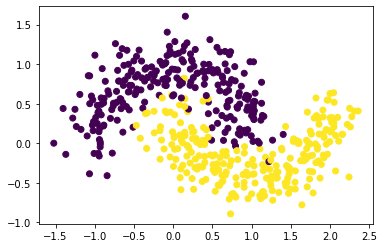

In [91]:
plt.scatter(Xmoon[:,0],Xmoon[:,1],c=Ymoon)
plt.show()

In [92]:
weights_moon=train(Xmoon,Ymoon,maxEpochs=1700,learning_rate=0.1)

Loss is  0.683337399934543
Epoch is  0
Loss is  0.604370261882953
Epoch is  10
Loss is  0.5498931887254914
Epoch is  20
Loss is  0.510431179157225
Epoch is  30
Loss is  0.48067650503018305
Epoch is  40
Loss is  0.4575094031522845
Epoch is  50
Loss is  0.43899406869154767
Epoch is  60
Loss is  0.4238715058438496
Epoch is  70
Loss is  0.41129063776643293
Epoch is  80
Loss is  0.4006575420897584
Epoch is  90
Loss is  0.3915465531250635
Epoch is  100
Loss is  0.3836455664810237
Epoch is  110
Loss is  0.37672116835831515
Epoch is  120
Loss is  0.3705957255195356
Epoch is  130
Loss is  0.3651319401120889
Epoch is  140
Loss is  0.3602222003601272
Epoch is  150
Loss is  0.35578109077477327
Epoch is  160
Loss is  0.35174003031695916
Epoch is  170
Loss is  0.34804337217171566
Epoch is  180
Loss is  0.3446455253211803
Epoch is  190
Loss is  0.3415088019582027
Epoch is  200
Loss is  0.3386017880771866
Epoch is  210
Loss is  0.33589809624060696
Epoch is  220
Loss is  0.33337540098116336
Epoch is  2

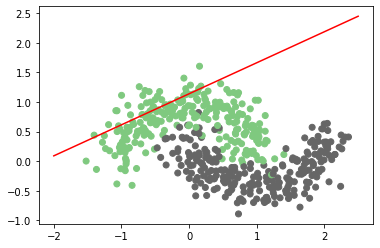

In [93]:
w0=weights_moon[0]
w1=weights_moon[1]
w2=weights_moon[2]

x1_moon=np.linspace(-2,2.5,10)
x2_moon=-((w1*x1+w0)/w2)
plt.scatter(Xmoon[:,0],Xmoon[:,1],c=Ymoon,cmap=plt.cm.Accent)
plt.plot(x1_moon,x2_moon, c='r')
plt.show()

In [102]:
import pandas as pd

In [103]:
df=pd.read_csv('Data_quiz.csv')

In [108]:
Xdata=df.drop(['Output'],axis=1)
Xdata=np.array(Xdata)
Ydata=df['Output']
Ydata=np.array(Ydata)